In [140]:
import pyart
import scipy
import numpy as np
from glob import glob
import matplotlib.pyplot as plt


https://docs.google.com/spreadsheets/d/1Vq3x_EGaZcT2ABXvUg1xXf0XEB3aF21OUNPyYxXvoWQ/edit#gid=2056007387

In [413]:
data_dir='/Users/rrniii/jasmin_ncas_vol2/data/xband/chilbolton/cfradial/uncalib_v1/vert/20170706/'

In [414]:
files=glob(data_dir+'*.nc')

In [415]:
len(files)

215

In [541]:
f=92
print(files[f])
radar=pyart.io.read(files[f])

/Users/rrniii/jasmin_ncas_vol2/data/xband/chilbolton/cfradial/uncalib_v1/vert/20170706/ncas-mobile-x-band-radar-1_chilbolton_20170706-101919_VER_v1.nc


In [542]:
radar.fields.keys()

dict_keys(['CCOR', 'CCORv', 'DOP', 'DOPu', 'KDP', 'PhiDP', 'RhoHV', 'RhoHVu', 'SNR', 'SNRu', 'SNRv', 'SNRvu', 'SQI', 'SQIu', 'SQIv', 'SQIvu', 'V', 'Vu', 'Vv', 'Vvu', 'W', 'Wu', 'Wv', 'Wvu', 'ZDR', 'ZDRu', 'dBZ', 'dBZv', 'dBuZ', 'dBuZv', 'uKDP', 'uKDPu', 'uPhiDP', 'uPhiDPu'])

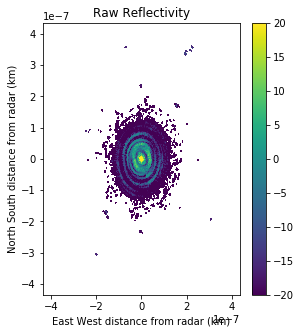

In [543]:
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(131)
display = pyart.graph.RadarDisplay(radar)
display.plot('dBuZ', 0, ax=ax1, vmin=-20, vmax=20.,
             colorbar_label='', title='Raw Reflectivity')

(0, 3000)

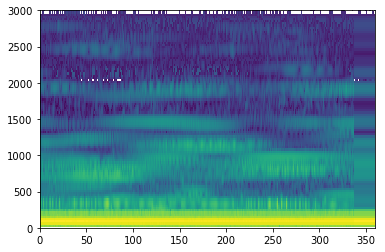

In [544]:
plt.pcolor(radar.azimuth['data'],radar.range['data'],np.transpose(radar.fields['dBuZ']['data']), snap=True)
plt.ylim((0,3000))

In [547]:
Zb=23
print(radar.range['data'][Zb])
Zt=30
print(radar.range['data'][Zt])
fifth=np.median(radar.fields['dBuZ']['data'][:,Zb:Zt],axis=1)
fifthv=np.median(radar.fields['dBuZv']['data'][:,Zb:Zt],axis=1)

window=21
fifth_sm=scipy.signal.medfilt(fifth,window)
fifth_smv=scipy.signal.medfilt(fifthv,window)

705.0
915.0


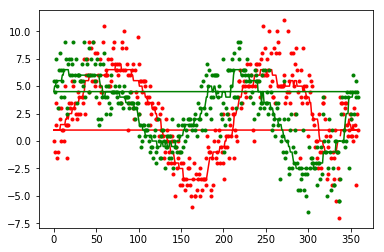

In [548]:
plt.plot(radar.azimuth['data'],fifth,'r.')
plt.plot(radar.azimuth['data'],fifth_sm,'r')



plt.plot(radar.azimuth['data'],fifthv,'g.')
plt.plot(radar.azimuth['data'],fifth_smv,'g')
#plt.ylim((-30,-10))

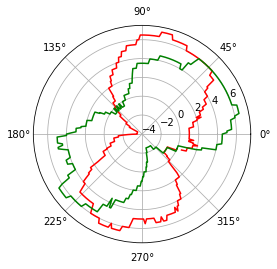

In [549]:
#plt.polar(radar.azimuth['data'],fifth,'r.')
plt.polar(np.deg2rad(radar.azimuth['data']),fifth_sm,'-r')
plt.polar(np.deg2rad(radar.azimuth['data']),fifth_smv,'-g')
ax=plt.gca()
#ax.set_rlim(-30,-15)

In [497]:
radar.azimuth['data']

masked_array(data=[3.20026245e+02, 3.21009521e+02, 3.22009277e+02,
                   3.23014526e+02, 3.24036255e+02, 3.25036011e+02,
                   3.26013794e+02, 3.27019043e+02, 3.28002319e+02,
                   3.29002075e+02, 3.30018311e+02, 3.31018066e+02,
                   3.32001343e+02, 3.33001099e+02, 3.34006348e+02,
                   3.35022583e+02, 3.36027832e+02, 3.37011108e+02,
                   3.38016357e+02, 3.39027100e+02, 3.40026855e+02,
                   3.41004639e+02, 3.42009888e+02, 3.43031616e+02,
                   3.44042358e+02, 3.45014648e+02, 3.46014404e+02,
                   3.47025146e+02, 3.48035889e+02, 3.49002686e+02,
                   3.50018921e+02, 3.51029663e+02, 3.52001953e+02,
                   3.53007202e+02, 3.54023438e+02, 3.55023193e+02,
                   3.56006470e+02, 3.57006226e+02, 3.58016968e+02,
                   3.59033203e+02, 5.49316406e-03, 1.01623535e+00,
                   2.02697754e+00, 3.03771973e+00, 4.00451660e